# Hierarchical Clustering Breast Cancer Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

## Import Data

In [11]:
data = pd.read_csv('Wisconsin_Breast_Cancers.csv', index_col=0, usecols=range(0,10))
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(684, 9)


,Clump_Thickness,Size_Uniformity,Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Sample,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [12]:
data_array = data.values
print (data_array.shape)

(684, 9)


## Calculate Distance

In [39]:
data_dist = pdist(data_array) # computing the distance
data_link = linkage(data_array, 'ward') # computing the linkage

## Dendrogram

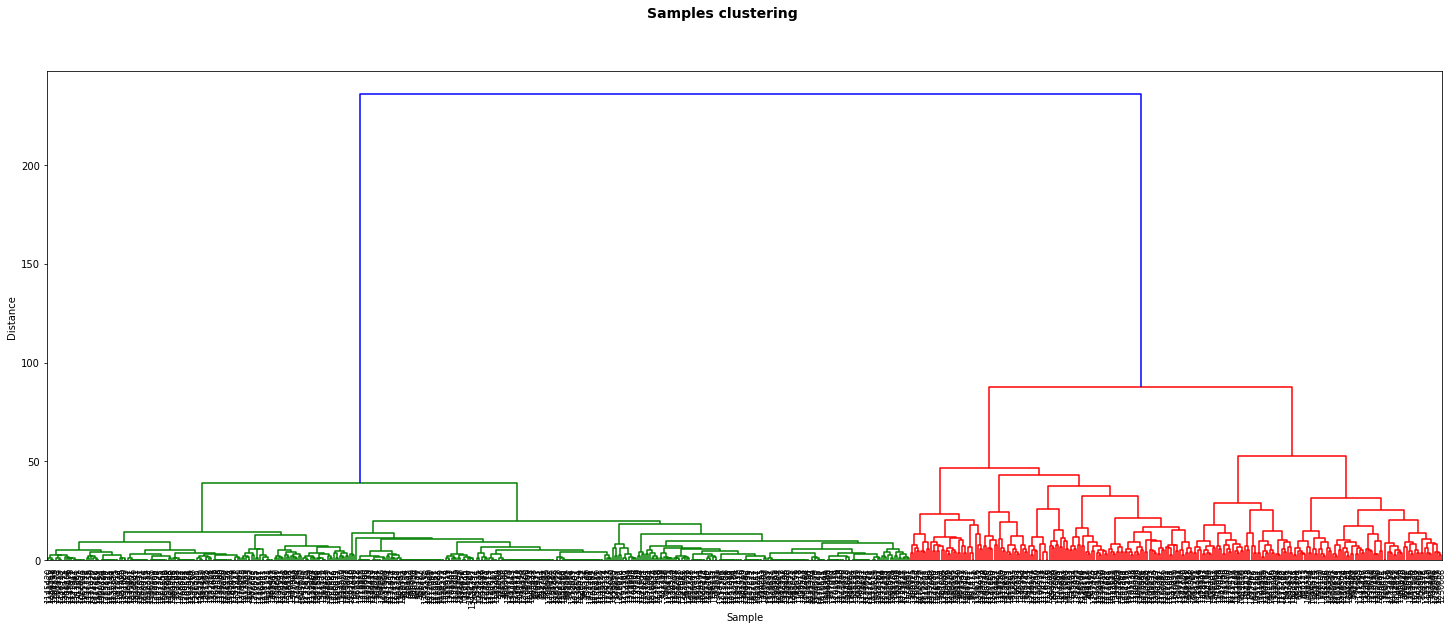

In [40]:
plt.rcParams['figure.figsize'] = (25, 9)
dendrogram(data_link, labels=data.index, leaf_rotation=90.0, leaf_font_size=8.)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

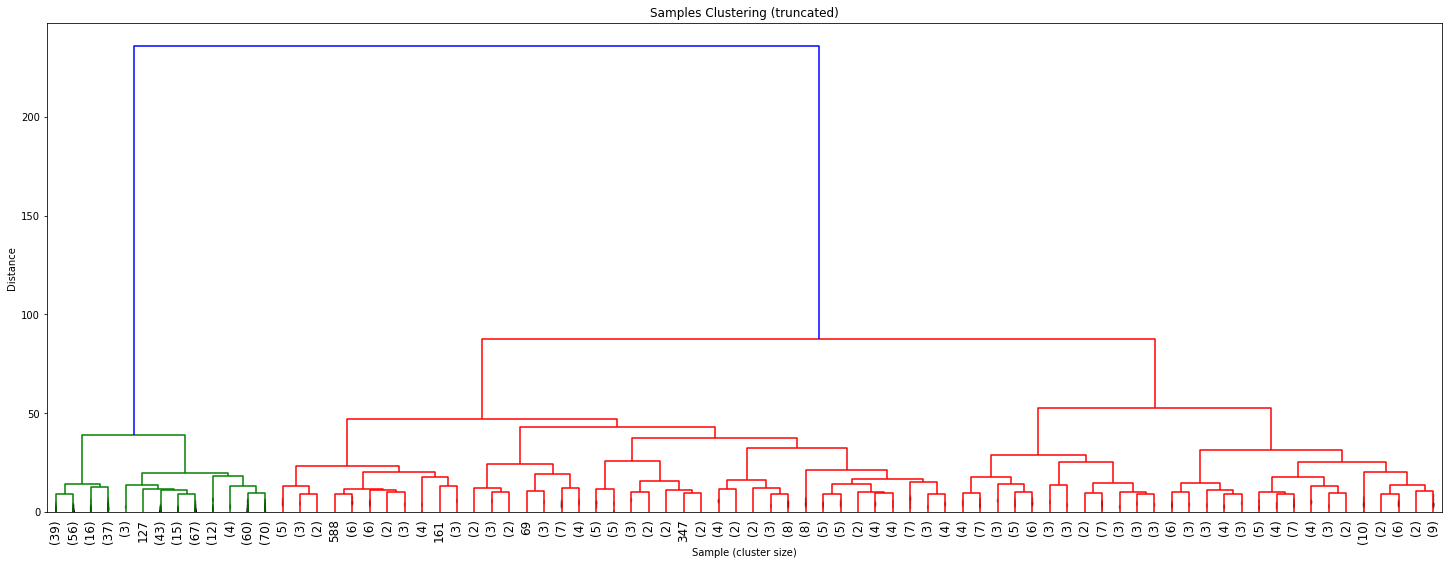

In [41]:
plt.title('Samples Clustering (truncated)')
plt.xlabel('Sample (cluster size)')
plt.ylabel('Distance')
dendrogram(
    data_link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Heat Map

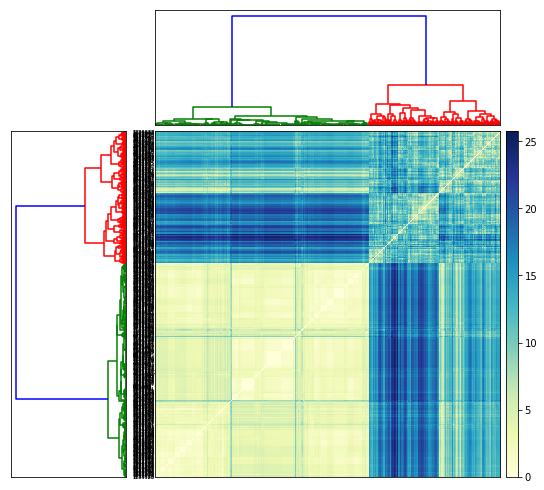

In [35]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='ward')
Z1 = dendrogram(Y, orientation='left',labels=data.index) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)